In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import time

In [26]:
inventories = pd.read_csv('inventories.csv')
inventory_parts = pd.read_csv('inventory_parts.csv')
inventory_sets = pd.read_csv('inventory_sets.csv')
part_categories = pd.read_csv('part_categories.csv')
parts = pd.read_csv('parts.csv')
sets = pd.read_csv('sets.csv')
themes = pd.read_csv('themes.csv')
colors = pd.read_csv('colors.csv')

In [27]:
inventories

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1
...,...,...,...
11676,18593,1,31066-1
11677,18645,1,71018-7
11678,18701,1,71018-17
11679,18704,1,60159-1


In [28]:
inventory_parts

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f
...,...,...,...,...,...
580246,18708,99206,0,3,f
580247,18708,99207,71,4,f
580248,18708,99780,15,4,f
580249,18708,99780,0,9,f


In [29]:
inventory_sets

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1
...,...,...,...
2841,18701,71018-5,1
2842,18701,71018-6,1
2843,18701,71018-7,1
2844,18701,71018-8,1


In [30]:
part_categories

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special
5,6,Bricks Wedged
6,7,Containers
7,8,Technic Bricks
8,9,Plates Special
9,10,Tiles Printed


In [31]:
parts

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1
...,...,...,...
25988,zbb013,Znap Connector 3 x 3 - 4 way B (Beam),43
25989,zbb014,Znap Connector 1 x 3 - 2 way A,43
25990,zbb015,"Znap Beam 3, 1 Hole",43
25991,zbb018,Znap Connector 3 x 3 - 4 way C (Closed),43


In [32]:
sets

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28


In [33]:
themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


In [34]:
colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [35]:
# Function to create a graph for a single set
def create_set_graph(set_num, set_data):
    G = nx.Graph()
    
    # Filter parts for the given set
    set_parts_data = set_data[set_data['set_num'] == set_num]
    
    # Skip if no parts (empty set)
    if set_parts_data.empty or set_parts_data['part_num'].isnull().all():
        return None
    
    # Add nodes for each part with metadata
    for _, row in set_parts_data.iterrows():
        part_num = row['part_num']
        G.add_node(part_num,
                   name=row['name_part'],
                   category=row['name_cat'],
                   color=row['name'],  # Color name from colors table
                   quantity=row['quantity'],
                   is_spare=row['is_spare'])
    
    # Add edges between all pairs of parts, with weights based on shared attributes
    part_list = set_parts_data[['part_num', 'name_cat', 'name']].drop_duplicates()
    part_to_category = dict(zip(part_list['part_num'], part_list['name_cat']))
    part_to_color = dict(zip(part_list['part_num'], part_list['name']))
    
    for part1, part2 in combinations(G.nodes, 2):
        # Calculate edge weight based on shared attributes
        weight = 0
        if part_to_category.get(part1) == part_to_category.get(part2):
            weight += 1  # Same category
        if part_to_color.get(part1) == part_to_color.get(part2):
            weight += 0.5  # Same color
        G.add_edge(part1, part2, weight=max(weight, 0.1))  # Minimum weight for connectivity
    
    return G

# Feature extraction for classification
def extract_graph_features(graph):
    return {
        'num_nodes': graph.number_of_nodes(),
        'num_edges': graph.number_of_edges(),
        'avg_degree': np.mean([d for n, d in graph.degree()]) if graph.number_of_nodes() > 0 else 0,
        'clustering_coeff': nx.average_clustering(graph) if graph.number_of_nodes() > 0 else 0,
        'density': nx.density(graph) if graph.number_of_nodes() > 0 else 0,
        'avg_quantity': np.mean([graph.nodes[n].get('quantity', 1) for n in graph.nodes]) if graph.number_of_nodes() > 0 else 0
    }

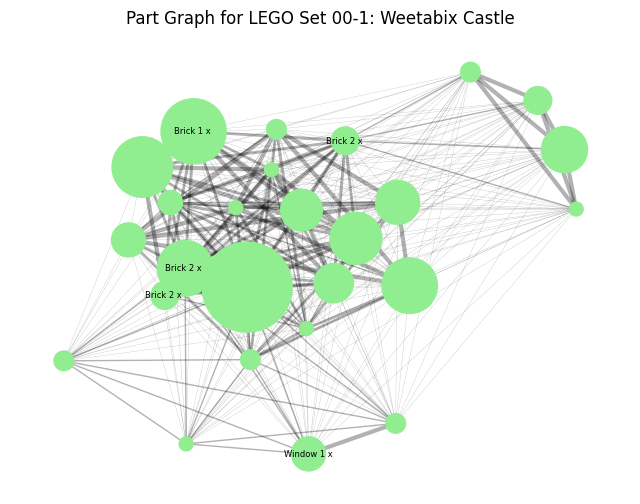


Set 00-1 Graph Metadata:
Part 29c01: {'name': 'Window 1 x 1 x 2 with Glass', 'category': 'Windows and Doors', 'color': 'White', 'quantity': 6.0, 'is_spare': 'f'}
Part 3001a: {'name': 'Brick 2 x 4 without Cross Supports', 'category': 'Bricks', 'color': 'Blue', 'quantity': 4.0, 'is_spare': 'f'}
Part 3002a: {'name': 'Brick 2 x 3 without Cross Supports', 'category': 'Bricks', 'color': 'White', 'quantity': 16.0, 'is_spare': 'f'}
Is graph for set 00-1 connected? True


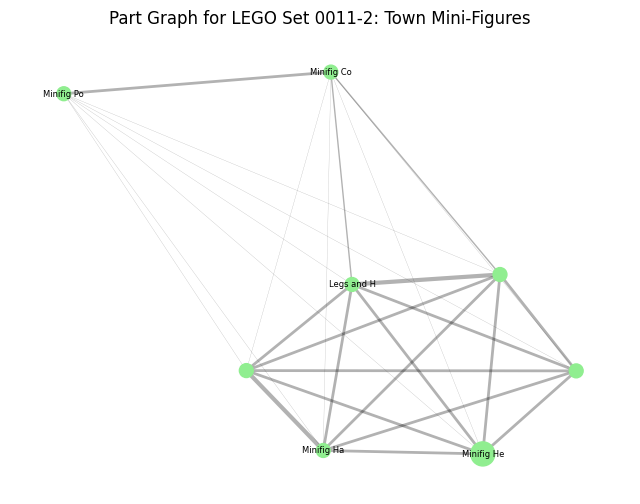


Set 0011-2 Graph Metadata:
Part 3624: {'name': 'Minifig Police Style Cap', 'category': 'Minifig Accessories', 'color': 'White', 'quantity': 1.0, 'is_spare': 'f'}
Part 3625: {'name': 'Minifig Hair Female with Pigtails', 'category': 'Minifigs', 'color': 'Black', 'quantity': 1.0, 'is_spare': 'f'}
Part 3626apr0001: {'name': 'Minifig Head Standard Grin Print [Solid Stud]', 'category': 'Minifigs', 'color': 'Yellow', 'quantity': 3.0, 'is_spare': 'f'}
Is graph for set 0011-2 connected? True


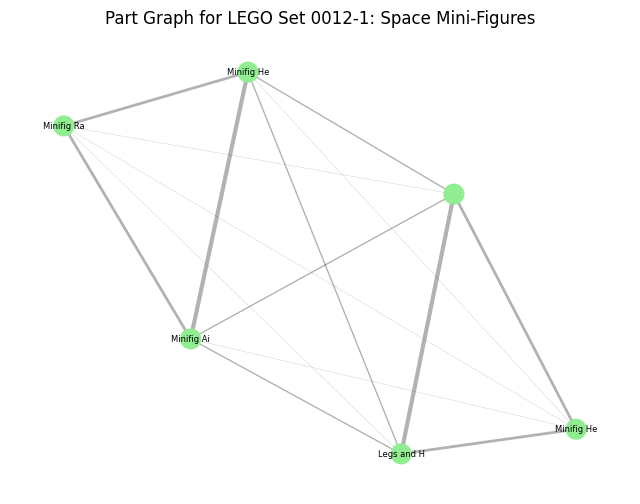


Set 0012-1 Graph Metadata:
Part 3626apr0001: {'name': 'Minifig Head Standard Grin Print [Solid Stud]', 'category': 'Minifigs', 'color': 'Yellow', 'quantity': 2.0, 'is_spare': 'f'}
Part 3838: {'name': 'Minifig Airtanks', 'category': 'Minifig Accessories', 'color': 'Red', 'quantity': 2.0, 'is_spare': 'f'}
Part 3842a: {'name': 'Minifig Helmet Classic with Thin Chin Guard and Visor Dimples', 'category': 'Minifig Accessories', 'color': 'Red', 'quantity': 2.0, 'is_spare': 'f'}
Is graph for set 0012-1 connected? True


In [36]:
# Assuming datasets: sets, themes, inventories, inventory_parts, parts, part_categories, colors
# Merge datasets to get set metadata
sets_themes = sets.merge(themes, left_on='theme_id', right_on='id', suffixes=('_set', '_theme'))
sets_themes = sets_themes.rename(columns={'id': 'theme_id_actual'})

# Link inventories to sets (use latest version)
inventories = inventories.sort_values('version').drop_duplicates('set_num', keep='last')
sets_inventories = sets_themes.merge(inventories, on='set_num', how='left')

# Merge with inventory_parts to get part details
set_parts = sets_inventories.merge(inventory_parts, left_on='id', right_on='inventory_id', how='left')
set_parts = set_parts.merge(parts, on='part_num', how='left')
set_parts = set_parts.merge(part_categories, left_on='part_cat_id', right_on='id', suffixes=('_part', '_cat'))
set_parts = set_parts.merge(colors, left_on='color_id', right_on='id', suffixes=('_part', '_color'))

# Filter out sets with no part data
valid_sets = set_parts[set_parts['part_num'].notnull()]['set_num'].unique()
set_parts = set_parts[set_parts['set_num'].isin(valid_sets)]
sets_inventories = sets_inventories[sets_inventories['set_num'].isin(valid_sets)]

# Create and visualize graphs for a few valid sets
sample_sets = sets_inventories['set_num'].head(3).tolist()
for set_num in sample_sets:
    set_graph = create_set_graph(set_num, set_parts)
    
    if set_graph is None:
        print(f"\nSet {set_num} has no part data, skipping visualization.")
        continue
    
    # Visualize the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(set_graph, k=0.3, iterations=20)
    
    # Draw nodes (size based on part quantity)
    node_sizes = [set_graph.nodes[part].get('quantity', 1) * 100 for part in set_graph.nodes]
    nx.draw_networkx_nodes(set_graph, pos, node_size=node_sizes, node_color='lightgreen')
    
    # Draw edges (thicker for higher weights)
    edge_weights = [set_graph[part1][part2]['weight'] for part1, part2 in set_graph.edges]
    nx.draw_networkx_edges(set_graph, pos, width=[w * 2 for w in edge_weights], alpha=0.3)
    
    # Add labels for a few nodes
    labels = {node: set_graph.nodes[node]['name'][:10] for node in list(set_graph.nodes)[:5]}
    nx.draw_networkx_labels(set_graph, pos, labels, font_size=6)
    
    set_name = sets_inventories[sets_inventories['set_num'] == set_num]['name_set'].iloc[0]
    plt.title(f"Part Graph for LEGO Set {set_num}: {set_name}")
    plt.axis('off')
    plt.show()
    
    # Print sample node metadata
    print(f"\nSet {set_num} Graph Metadata:")
    for node in list(set_graph.nodes)[:3]:
        print(f"Part {node}: {set_graph.nodes[node]}")
    
    # Check if graph is connected
    is_connected = nx.is_connected(set_graph)
    print(f"Is graph for set {set_num} connected? {is_connected}")

In [37]:
# Extract features for all valid sets
set_features = []
set_graphs = []
for set_num in valid_sets:
    set_graph = create_set_graph(set_num, set_parts)
    if set_graph is None:
        continue
    set_graphs.append(set_graph)
    features = extract_graph_features(set_graph)
    features['set_num'] = set_num
    # Get num_parts and theme from sets_themes
    set_info = sets_themes[sets_themes['set_num'] == set_num]
    if not set_info.empty:
        features['num_parts'] = set_info['num_parts'].iloc[0]
        features['theme_name'] = set_info['name_theme'].iloc[0]
    set_features.append(features)

# Convert to DataFrame
features_df = pd.DataFrame(set_features)

In [38]:
# Step 2: Feature engineering
# One-hot encode the theme_name
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
theme_encoded = encoder.fit_transform(features_df[['theme_name']])
theme_encoded_df = pd.DataFrame(theme_encoded, columns=encoder.get_feature_names_out(['theme_name']))

# Combine graph features with theme features
X = pd.concat([features_df[['num_nodes', 'num_edges', 'avg_degree', 'clustering_coeff', 'density', 'avg_quantity']], theme_encoded_df], axis=1)
y = features_df['num_parts']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Step 4: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 161.8187419042297


In [48]:
# Step 5: Predict for a new set with variability
def predict_pieces_and_graph(theme_name, set_parts, model, encoder, feature_columns):
    # Reset random seed for fresh randomization
    np.random.seed(int(time.time()))
    
    theme_features = features_df[features_df['theme_name'] == theme_name]
    if theme_features.empty:
        print(f"No sets found for theme {theme_name}")
        return None, None, None
    
    # Sample graph features from normal distribution
    sampled_features = {}
    for feature in ['num_nodes', 'num_edges', 'avg_degree', 'clustering_coeff', 'density', 'avg_quantity']:
        mean = theme_features[feature].mean()
        std = theme_features[feature].std()
        if np.isnan(std) or std == 0:
            std = 0.1 * mean if mean > 0 else 0.1  # Fallback for low-variance features
        sampled_value = np.random.normal(mean, std)
        sampled_features[feature] = max(0, sampled_value)  # Ensure non-negative
    
    # Encode the theme
    theme_encoded = encoder.transform([[theme_name]])
    theme_encoded_df = pd.DataFrame(theme_encoded, columns=encoder.get_feature_names_out(['theme_name']))
    
    # Combine features
    input_features = pd.concat([pd.DataFrame([sampled_features]), theme_encoded_df], axis=1)[feature_columns]
    
    # Predict number of pieces
    predicted_pieces = int(model.predict(input_features)[0])
    print(f"Predicted number of pieces for theme {theme_name}: {predicted_pieces}")
    
    # Generate synthetic graph
    synthetic_graph = nx.erdos_renyi_graph(n=predicted_pieces, p=sampled_features['density'])
    
    # Assign part attributes and collect piece data
    sample_parts = set_parts[set_parts['set_num'].isin(theme_features['set_num'])]['part_num'].unique()
    pieces_data = []
    if len(sample_parts) > 0:
        for node in synthetic_graph.nodes:
            part = np.random.choice(sample_parts)
            part_info = set_parts[set_parts['part_num'] == part].iloc[0]
            quantity = int(np.random.randint(1, max(2, int(sampled_features['avg_quantity'] + 1))))
            synthetic_graph.nodes[node]['name'] = part_info['name_part']
            synthetic_graph.nodes[node]['quantity'] = quantity
            pieces_data.append({
                'part_num': part,
                'part_name': part_info['name_part'],
                'quantity': quantity
            })
    
    pieces_df = pd.DataFrame(pieces_data)
    
    return predicted_pieces, synthetic_graph, pieces_df

c:\Users\CSE_Sim\anaconda3\envs\data_mining\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted number of pieces for theme Star Wars Episode 3: 263


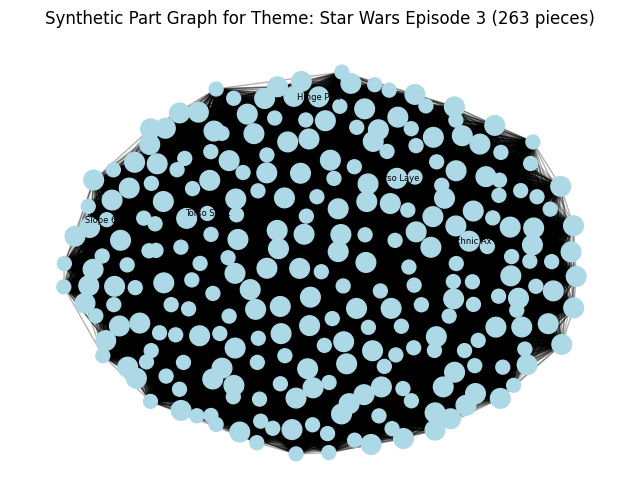


Predicted Pieces for Theme: Star Wars Episode 3
         part_num                                          part_name  quantity
0    973pr2137c01  Torso SW Layered Shirt, Datk Orange Belt Print...         1
1           60481                                Slope 65° 2 x 1 x 2         1
2           6538b  Technic Axle Connector Ridged [with x Hole x O...         2
3    973pr0290c01  Torso Layered Jedi Robe Upper, Reddish Brown U...         2
4           60471   Hinge Plate 1 x 2 Locking with 2 Fingers on Side         2
..            ...                                                ...       ...
258         44225  Technic Rotation Joint Disk with Pin and 3L Be...         1
259          3038                                    Slope 45° 2 x 3         2
260         87083                           Technic Axle 4 with Stop         1
261          3001                                        Brick 2 x 4         1
262         23306        Minifig Lightsaber Hilt without Bottom Ring         1

[2

In [49]:
theme_to_predict = 'Star Wars Episode 3'  # Specified theme
feature_columns = X.columns
predicted_pieces, synthetic_graph, pieces_df = predict_pieces_and_graph(theme_to_predict, set_parts, model, encoder, feature_columns)

if synthetic_graph:
    # Visualize synthetic graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(synthetic_graph, k=0.3, iterations=20)
    node_sizes = [synthetic_graph.nodes[part].get('quantity', 1) * 100 for part in synthetic_graph.nodes]
    nx.draw_networkx_nodes(synthetic_graph, pos, node_size=node_sizes, node_color='lightblue')
    nx.draw_networkx_edges(synthetic_graph, pos, alpha=0.3)
    labels = {node: synthetic_graph.nodes[node]['name'][:10] for node in list(synthetic_graph.nodes)[:5]}
    nx.draw_networkx_labels(synthetic_graph, pos, labels, font_size=6)
    plt.title(f"Synthetic Part Graph for Theme: {theme_to_predict} ({predicted_pieces} pieces)")
    plt.axis('off')
    plt.savefig('synthetic_graph.png')
    plt.show()
    
    # Display pieces DataFrame
    print(f"\nPredicted Pieces for Theme: {theme_to_predict}")
    print(pieces_df)

Predicted number of pieces for theme City: 92


c:\Users\CSE_Sim\anaconda3\envs\data_mining\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


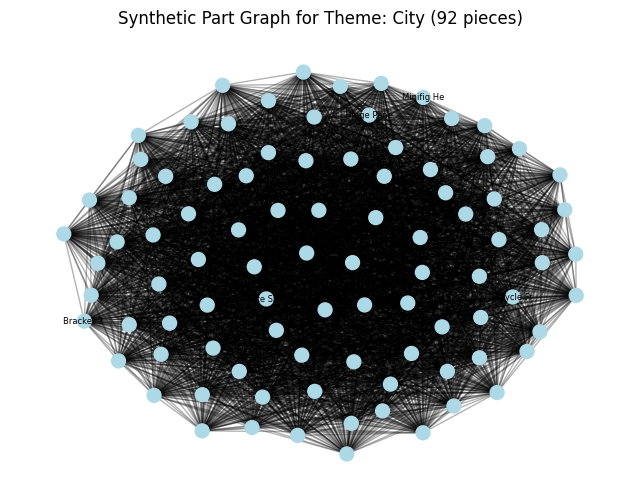


Predicted Pieces for Theme: City
       part_num                                          part_name  quantity
0          2817               Plate Special 2 x 2 with 2 Pin Holes         1
1         44572   Hinge Panel 2 x 4 x 3 1/3 Locking Dual 2 Fingers         1
2   3626cpr1091  Minifig Head Stubble, Black Eyebrows and Scowl...         1
3          3956                              Bracket 2 x 2 - 2 x 2         1
4          4719                                      Bicycle Frame         1
..          ...                                                ...       ...
87        2454a  Brick 1 x 2 x 5 with Blocked Open Studs and Bo...         1
88        98834                 Vehicle, Spoiler 2 x 4 with Handle         1
89  3626cpr1664  Minifig Head Glasses with Silver Sunglasses, E...         1
90       30361c  Brick, Round 2 x 2 x 2 Robot Body - with Botto...         1
91         6541                      Technic Brick 1 x 1 with Hole         1

[92 rows x 3 columns]


In [50]:
theme_to_predict = 'City'  # Specified theme
feature_columns = X.columns
predicted_pieces, synthetic_graph, pieces_df = predict_pieces_and_graph(theme_to_predict, set_parts, model, encoder, feature_columns)

if synthetic_graph:
    # Visualize synthetic graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(synthetic_graph, k=0.3, iterations=20)
    node_sizes = [synthetic_graph.nodes[part].get('quantity', 1) * 100 for part in synthetic_graph.nodes]
    nx.draw_networkx_nodes(synthetic_graph, pos, node_size=node_sizes, node_color='lightblue')
    nx.draw_networkx_edges(synthetic_graph, pos, alpha=0.3)
    labels = {node: synthetic_graph.nodes[node]['name'][:10] for node in list(synthetic_graph.nodes)[:5]}
    nx.draw_networkx_labels(synthetic_graph, pos, labels, font_size=6)
    plt.title(f"Synthetic Part Graph for Theme: {theme_to_predict} ({predicted_pieces} pieces)")
    plt.axis('off')
    plt.savefig('synthetic_graph.png')
    plt.show()
    
    # Display pieces DataFrame
    print(f"\nPredicted Pieces for Theme: {theme_to_predict}")
    print(pieces_df)

c:\Users\CSE_Sim\anaconda3\envs\data_mining\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted number of pieces for theme Star Wars Episode 2: 178


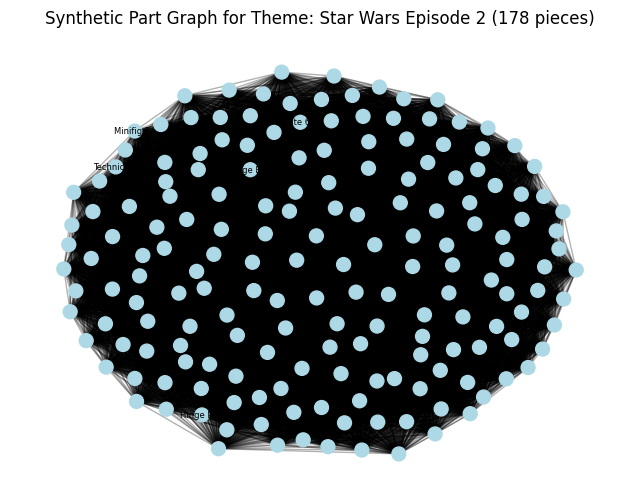


Predicted Pieces for Theme: Star Wars Episode 2
    part_num                                          part_name  quantity
0      76385  Hinge Brick 1 x 2 Locking with Single Finger O...         1
1      18588                   Minifig Rapid Shooter Six Barrel         1
2      6538b  Technic Axle Connector Ridged [with x Hole x O...         1
3       3036                                        Plate 6 x 8         1
4      92582     Hinge Plate 2 x 2 Locking with 1 Finger on Top         1
..       ...                                                ...       ...
173   50990a    Dish 10 x 10 Inverted (Radar) with Hollow Studs         1
174    18646           Plate Round Half 3 x 6 with 1 x 2 Cutout         1
175   30389b  Hinge Brick 2 x 2 Locking with 1 Finger Vertic...         1
176    43721                            Wedge 4 x 2 Sloped Left         1
177   970c00                  Legs and Hips [Complete Assembly]         1

[178 rows x 3 columns]


In [51]:
theme_to_predict = 'Star Wars Episode 2'  # Specified theme
feature_columns = X.columns
predicted_pieces, synthetic_graph, pieces_df = predict_pieces_and_graph(theme_to_predict, set_parts, model, encoder, feature_columns)

if synthetic_graph:
    # Visualize synthetic graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(synthetic_graph, k=0.3, iterations=20)
    node_sizes = [synthetic_graph.nodes[part].get('quantity', 1) * 100 for part in synthetic_graph.nodes]
    nx.draw_networkx_nodes(synthetic_graph, pos, node_size=node_sizes, node_color='lightblue')
    nx.draw_networkx_edges(synthetic_graph, pos, alpha=0.3)
    labels = {node: synthetic_graph.nodes[node]['name'][:10] for node in list(synthetic_graph.nodes)[:5]}
    nx.draw_networkx_labels(synthetic_graph, pos, labels, font_size=6)
    plt.title(f"Synthetic Part Graph for Theme: {theme_to_predict} ({predicted_pieces} pieces)")
    plt.axis('off')
    plt.savefig('synthetic_graph.png')
    plt.show()
    
    # Display pieces DataFrame
    print(f"\nPredicted Pieces for Theme: {theme_to_predict}")
    print(pieces_df)

c:\Users\CSE_Sim\anaconda3\envs\data_mining\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted number of pieces for theme Star Wars Episode 2: 385


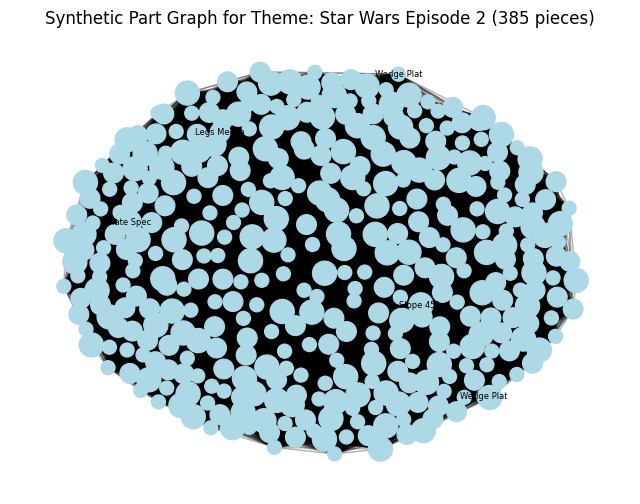


Predicted Pieces for Theme: Star Wars Episode 2
         part_num                                          part_name  quantity
0           54383                            Wedge Plate 6 x 3 Right         1
1            4445                                    Slope 45° 2 x 8         3
2            6106                       Wedge Plate 6 x 6 Cut Corner         1
3           30376                      Legs Mechanical, Battle Droid         2
4           4151a  Plate Special 8 x 8 with Grille [No Hole in Ce...         3
..            ...                                                ...       ...
380          2873                             Hinge Train Gate 2 x 4         3
381  973pb0260c01  Torso SW V-Collar Shirt and High Tie Belt Prin...         1
382         48336      Plate Special 1 x 2 [Side Handle Closed Ends]         3
383          3024                                        Plate 1 x 1         2
384          6005                    Brick Arch 1 x 3 x 2 Curved Top         1

[3

In [53]:
theme_to_predict = 'Star Wars Episode 2'  # Specified theme
feature_columns = X.columns
predicted_pieces, synthetic_graph, pieces_df = predict_pieces_and_graph(theme_to_predict, set_parts, model, encoder, feature_columns)

if synthetic_graph:
    # Visualize synthetic graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(synthetic_graph, k=0.3, iterations=20)
    node_sizes = [synthetic_graph.nodes[part].get('quantity', 1) * 100 for part in synthetic_graph.nodes]
    nx.draw_networkx_nodes(synthetic_graph, pos, node_size=node_sizes, node_color='lightblue')
    nx.draw_networkx_edges(synthetic_graph, pos, alpha=0.3)
    labels = {node: synthetic_graph.nodes[node]['name'][:10] for node in list(synthetic_graph.nodes)[:5]}
    nx.draw_networkx_labels(synthetic_graph, pos, labels, font_size=6)
    plt.title(f"Synthetic Part Graph for Theme: {theme_to_predict} ({predicted_pieces} pieces)")
    plt.axis('off')
    plt.savefig('synthetic_graph.png')
    plt.show()
    
    # Display pieces DataFrame
    print(f"\nPredicted Pieces for Theme: {theme_to_predict}")
    print(pieces_df)